In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
print("Necessary libraries imported successfully.")

Necessary libraries imported successfully.


## Load Dataset




In [27]:
df = pd.read_excel('solar_weather - Raw - Assignment Oct 2025-1.xlsx')
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
                  Time Energy Captured[Wh] Sun Light Intensity (W/m2)  \
0  2017-01-01 00:00:00                   0                          0   
1  2017-01-01 00:15:00                   0                          0   
2  2017-01-01 00:30:00                   0                          0   
3  2017-01-01 00:45:00                   0                          0   
4  2017-01-01 01:00:00                   0                          0   

  Temperature 1 Hour Rain Fall Cloud Coverage Length of Day_Light  
0         1.6                0            100                 450  
1         1.6                0            100                 450  
2         1.6                0            100                 450  
3         1.6                0            100                 450  
4         1.7                0            100                 450  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 

## Calculation of Descriptive Statistics


In [28]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

numerical_cols = [
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data types after initial conversion:")
df.info()

Data types after initial conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Time                        196769 non-null  datetime64[ns]
 1   Energy Captured[Wh]         196773 non-null  float64       
 2   Sun Light Intensity (W/m2)  196770 non-null  float64       
 3   Temperature                 196771 non-null  float64       
 4   1 Hour Rain Fall            196773 non-null  float64       
 5   Cloud Coverage              196764 non-null  float64       
 6   Length of Day_Light         196772 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 10.5 MB


In [29]:
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled NaN values in '{col}' with median: {median_val}")

print("\nDescriptive Statistics for Numerical Columns:")
for col in numerical_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0] if not df[col].mode().empty else 'N/A'
    std_dev_val = df[col].std()

    print(f"\n--- {col} ---")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Mode: {mode_val:.2f}" if isinstance(mode_val, (int, float)) else f"Mode: {mode_val}")
    print(f"Standard Deviation: {std_dev_val:.2f}")

Filled NaN values in 'Energy Captured[Wh]' with median: 0.0
Filled NaN values in 'Sun Light Intensity (W/m2)' with median: 1.6
Filled NaN values in 'Temperature' with median: 9.3
Filled NaN values in '1 Hour Rain Fall' with median: 0.0
Filled NaN values in 'Cloud Coverage' with median: 82.0
Filled NaN values in 'Length of Day_Light' with median: 765.0

Descriptive Statistics for Numerical Columns:

--- Energy Captured[Wh] ---
Mean: 573.00
Median: 0.00
Mode: 0.00
Standard Deviation: 1044.82

--- Sun Light Intensity (W/m2) ---
Mean: 32.60
Median: 1.60
Mode: 0.00
Standard Deviation: 52.17

--- Temperature ---
Mean: 9.79
Median: 9.30
Mode: 4.80
Standard Deviation: 8.00

--- 1 Hour Rain Fall ---
Mean: 0.07
Median: 0.00
Mode: 0.00
Standard Deviation: 0.28

--- Cloud Coverage ---
Mean: 65.97
Median: 82.00
Mode: 100.00
Standard Deviation: 36.64

--- Length of Day_Light ---
Mean: 748.65
Median: 765.00
Mode: 1020.00
Standard Deviation: 194.87


##  Frequency Distribution Charts


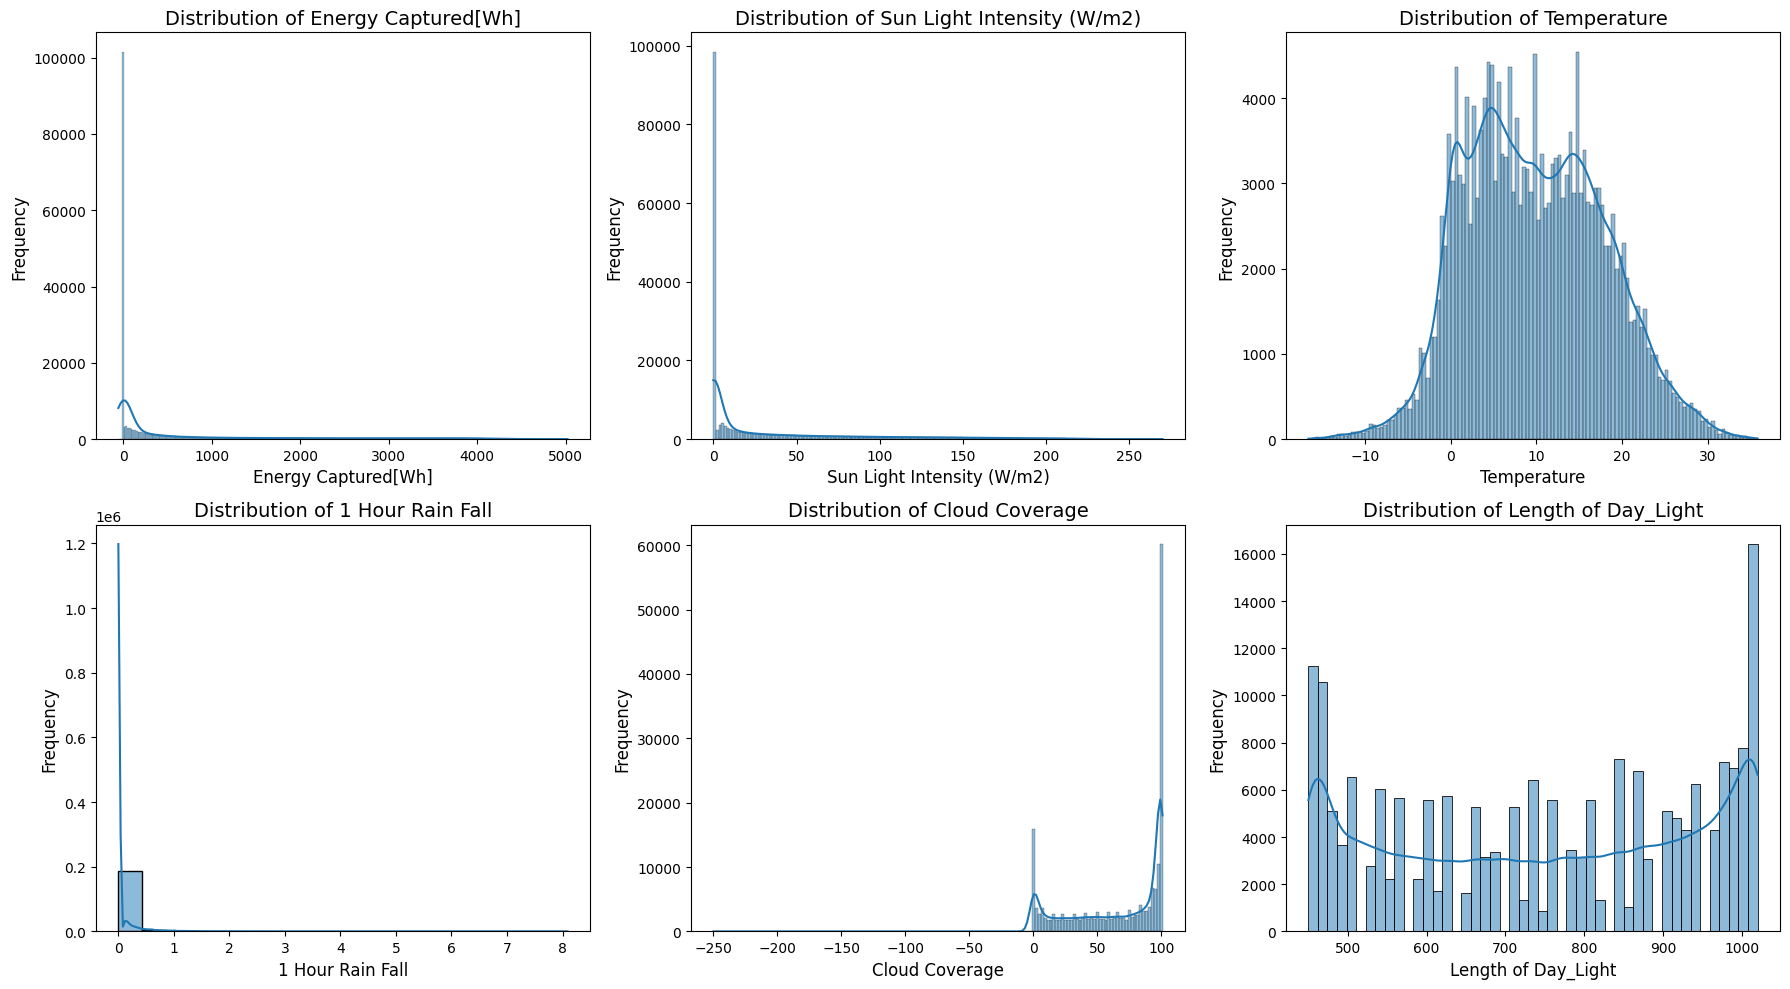

In [30]:
num_cols = len(numerical_cols)
n_rows = (num_cols + 2) // 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)


for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##  Correlation Heatmap making




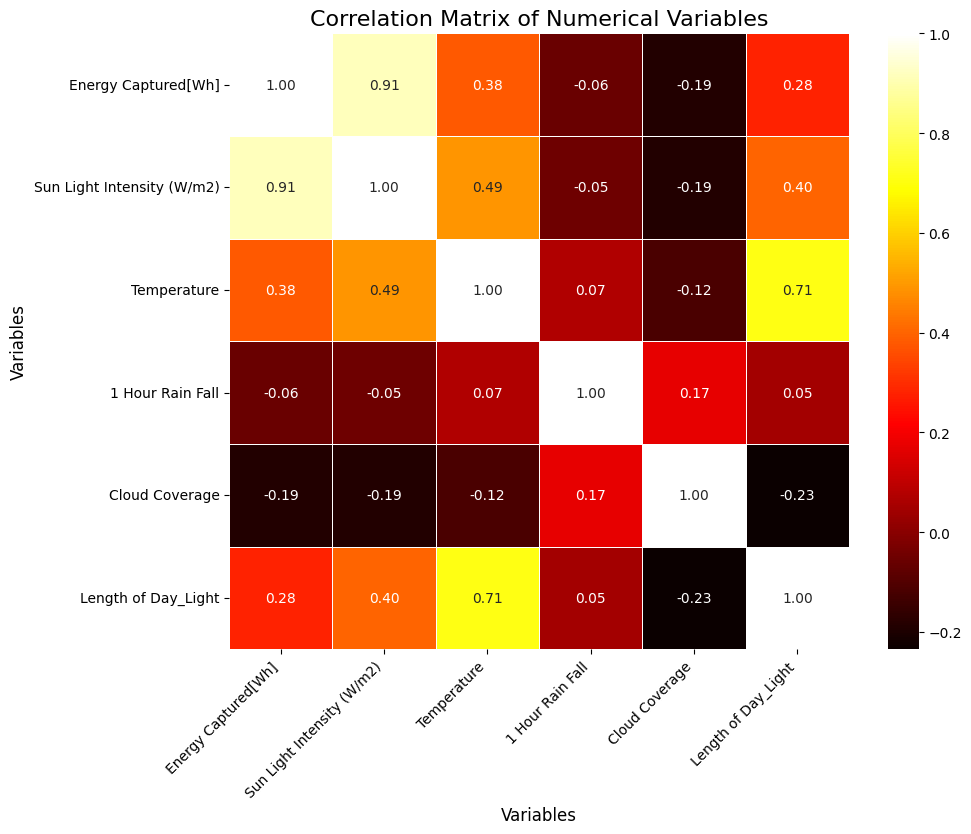

In [56]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='hot', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## EDA Findings




In [32]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing Values Information:")
print(missing_info)


Missing Values Information:
                            Missing Count  Missing Percentage
Time                                    8            0.004066
Energy Captured[Wh]                     0            0.000000
Sun Light Intensity (W/m2)              0            0.000000
Temperature                             0            0.000000
1 Hour Rain Fall                        0            0.000000
Cloud Coverage                          0            0.000000
Length of Day_Light                     0            0.000000



Box Plots for Outlier Identification:


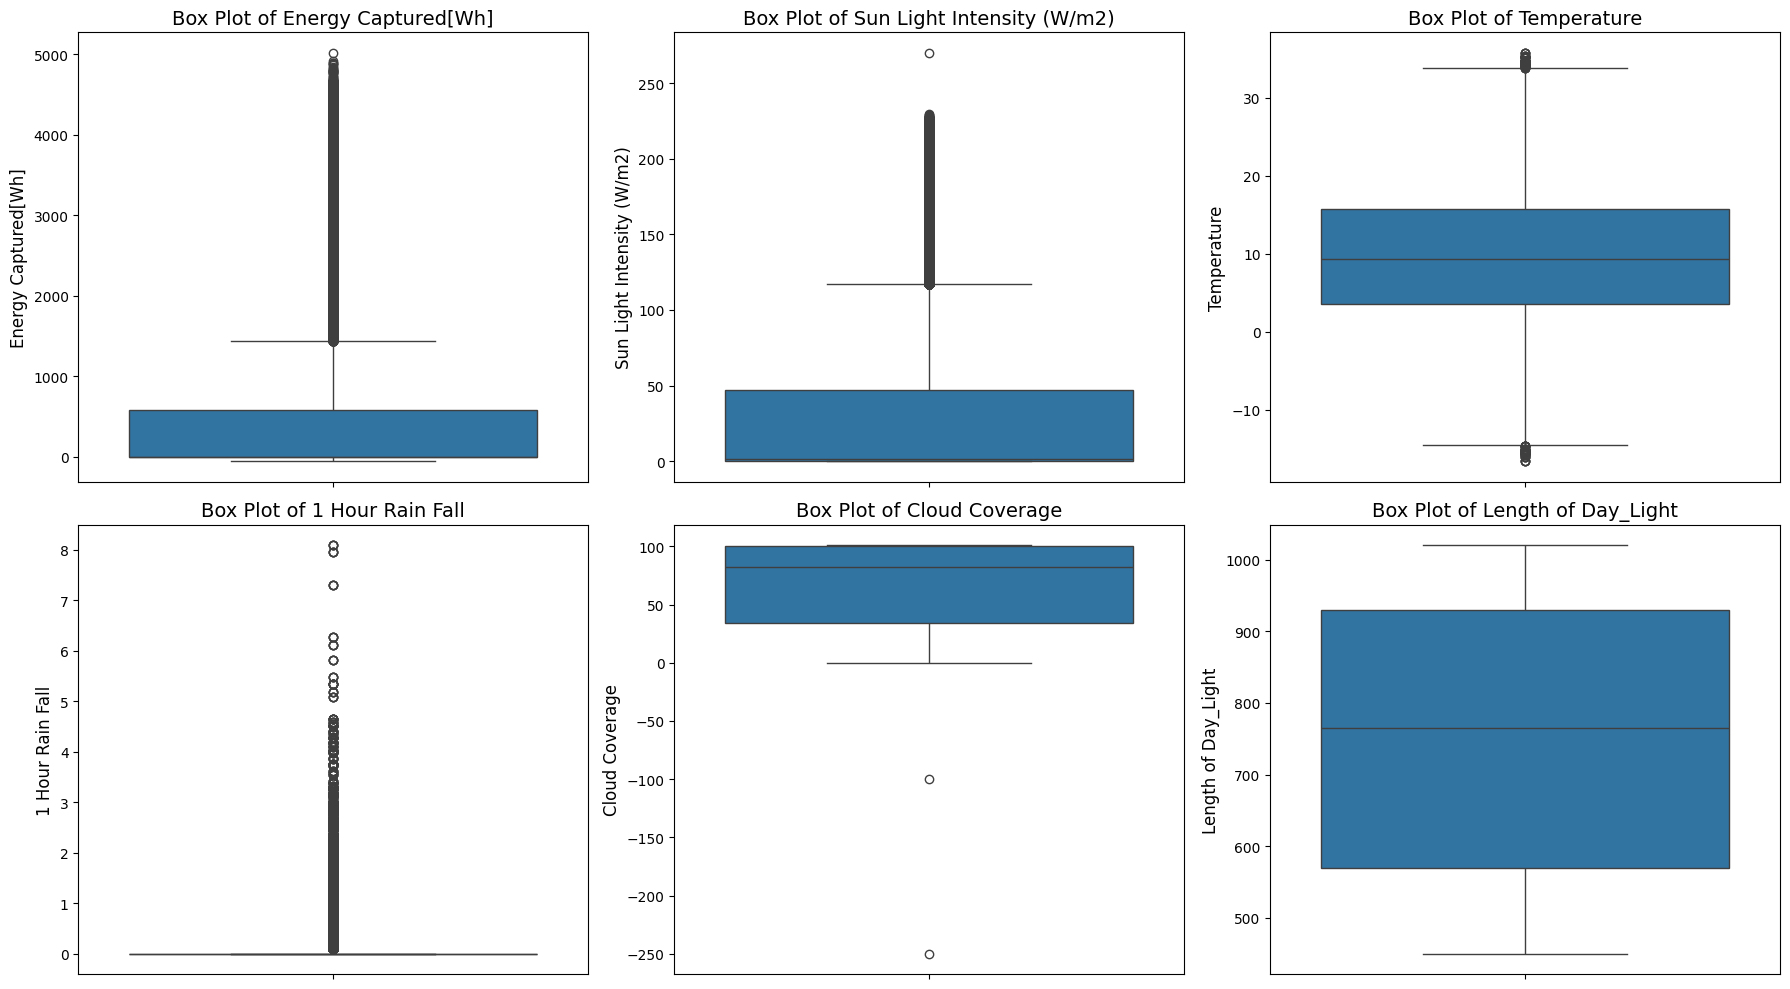

In [33]:
num_cols_for_outliers = len(numerical_cols)
n_rows_outliers = (num_cols_for_outliers + 2) // 3
n_cols_outliers = 3

fig, axes = plt.subplots(n_rows_outliers, n_cols_outliers, figsize=(18, 5 * n_rows_outliers))
axes = axes.flatten()

print("\nBox Plots for Outlier Identification:")
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)

for j in range(i + 1, n_rows_outliers * n_cols_outliers):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##  Missing Values repairing



In [34]:
df.dropna(subset=['Time'], inplace=True)
print("Missing values after dropping rows with missing 'Time' values:")
print(df.isnull().sum())

Missing values after dropping rows with missing 'Time' values:
Time                          0
Energy Captured[Wh]           0
Sun Light Intensity (W/m2)    0
Temperature                   0
1 Hour Rain Fall              0
Cloud Coverage                0
Length of Day_Light           0
dtype: int64


## Feature Engineering




In [35]:
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour
df['DayOfWeek'] = df['Time'].dt.dayofweek
df['DayOfYear'] = df['Time'].dt.dayofyear

print("DataFrame with new time-based features:")
print(df.head())

DataFrame with new time-based features:
                 Time  Energy Captured[Wh]  Sun Light Intensity (W/m2)  \
0 2017-01-01 00:00:00                  0.0                         0.0   
1 2017-01-01 00:15:00                  0.0                         0.0   
2 2017-01-01 00:30:00                  0.0                         0.0   
3 2017-01-01 00:45:00                  0.0                         0.0   
4 2017-01-01 01:00:00                  0.0                         0.0   

   Temperature  1 Hour Rain Fall  Cloud Coverage  Length of Day_Light  Year  \
0          1.6               0.0           100.0                450.0  2017   
1          1.6               0.0           100.0                450.0  2017   
2          1.6               0.0           100.0                450.0  2017   
3          1.6               0.0           100.0                450.0  2017   
4          1.7               0.0           100.0                450.0  2017   

   Month  Day  Hour  DayOfWeek  DayOfYea

##  Variables Correlated to Target



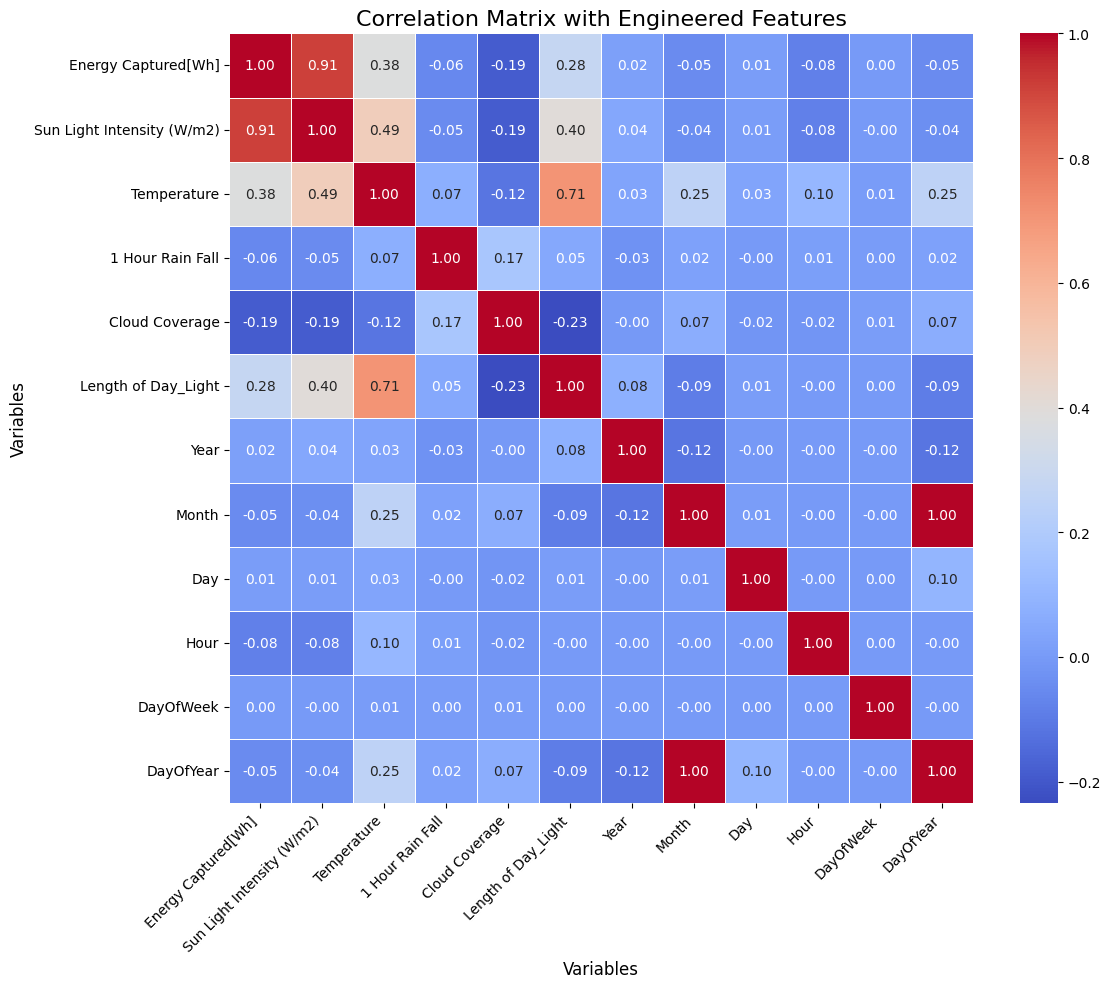

In [36]:
all_numerical_cols = numerical_cols + ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'DayOfYear']

correlation_matrix_extended = df[all_numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Engineered Features', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [37]:
target_correlation = correlation_matrix_extended['Energy Captured[Wh]'].sort_values(ascending=False, key=abs)

print("\nCorrelations with 'Energy Captured[Wh]' (sorted by absolute value):")
print(target_correlation)


Correlations with 'Energy Captured[Wh]' (sorted by absolute value):
Energy Captured[Wh]           1.000000
Sun Light Intensity (W/m2)    0.914572
Temperature                   0.378539
Length of Day_Light           0.280674
Cloud Coverage               -0.190126
Hour                         -0.080876
1 Hour Rain Fall             -0.059885
DayOfYear                    -0.049678
Month                        -0.049330
Year                          0.020806
Day                           0.007765
DayOfWeek                     0.000332
Name: Energy Captured[Wh], dtype: float64


## Training and testing



In [38]:
y = df['Energy Captured[Wh]']
X = df.drop(columns=['Time', 'Energy Captured[Wh]'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (157415, 11)
Shape of X_test: (39354, 11)
Shape of y_train: (157415,)
Shape of y_test: (39354,)


##  Linear Regression Model fitting




In [39]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Linear Regression model initialized and trained successfully.")
print("Predictions generated on the test set.")

Linear Regression model initialized and trained successfully.
Predictions generated on the test set.


In [40]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 169164.16
Root Mean Squared Error (RMSE): 411.30
R-squared (R2): 0.85


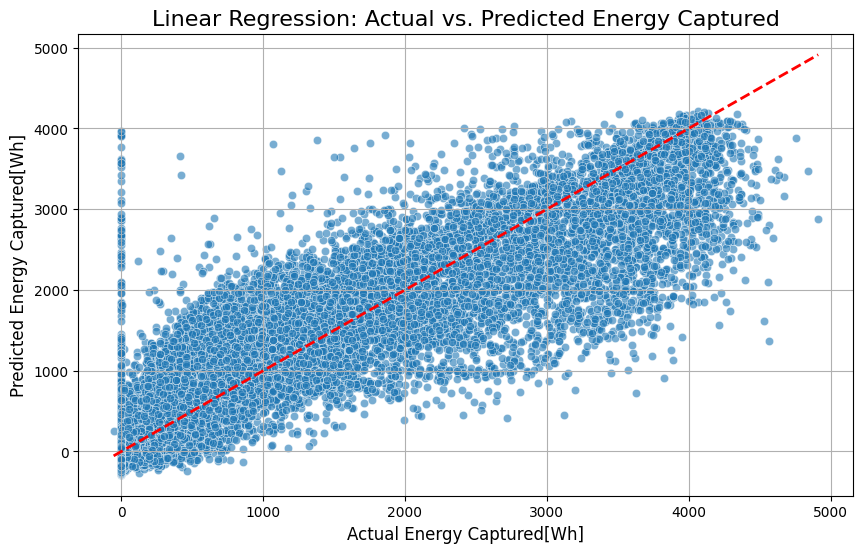

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs. Predicted Energy Captured', fontsize=16)
plt.xlabel('Actual Energy Captured[Wh]', fontsize=12)
plt.ylabel('Predicted Energy Captured[Wh]', fontsize=12)
plt.grid(True)
plt.show()

In [41]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Regressor model initialized and trained successfully.")
print("Predictions generated on the test set.")

Random Forest Regressor model initialized and trained successfully.
Predictions generated on the test set.


In [42]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Regressor Model Performance:
Mean Squared Error (MSE): 73231.98
Root Mean Squared Error (RMSE): 270.61
R-squared (R2): 0.93


## Random Forest Regressor Model result



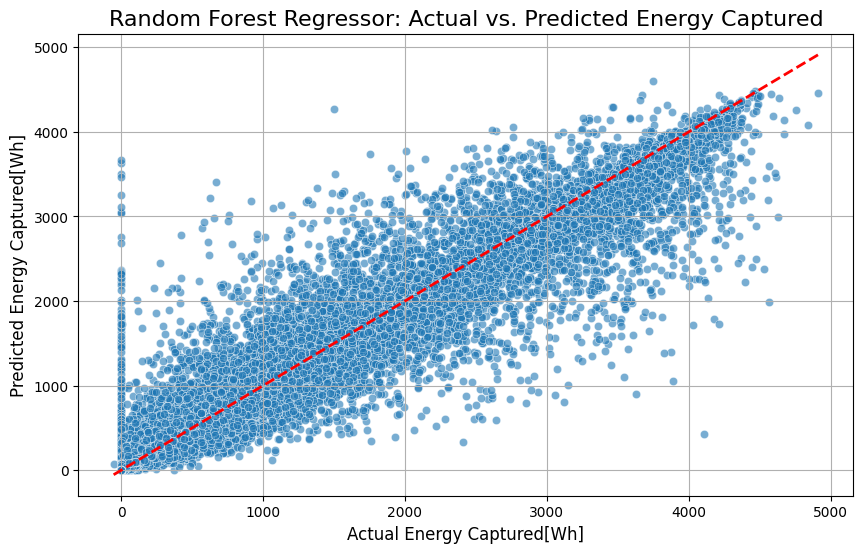

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.title('Random Forest Regressor: Actual vs. Predicted Energy Captured', fontsize=16)
plt.xlabel('Actual Energy Captured[Wh]', fontsize=12)
plt.ylabel('Predicted Energy Captured[Wh]', fontsize=12)
plt.grid(True)
plt.show()

In [46]:
print("Comparison of Actual vs. Predicted Energy Captured (first 5 rows):")
print(comparison_df_rf.head())

Comparison of Actual vs. Predicted Energy Captured (first 5 rows):
        Actual  Predicted
33592      0.0       0.00
15077      0.0       0.00
116954  1102.0    1171.59
141589     0.0       0.00
31418      0.0       0.00


## Comparison of Model Performances




In [44]:
print("\n--- Model Performance Comparison ---")
print("\nLinear Regression Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"  R-squared (R2): {r2_lr:.2f}")

print("\nRandom Forest Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R2): {r2_rf:.2f}")


--- Model Performance Comparison ---

Linear Regression Model Performance:
  Mean Squared Error (MSE): 169164.16
  Root Mean Squared Error (RMSE): 411.30
  R-squared (R2): 0.85

Random Forest Regressor Model Performance:
  Mean Squared Error (MSE): 73231.98
  Root Mean Squared Error (RMSE): 270.61
  R-squared (R2): 0.93


## Forecast table


In [55]:
historical_jan_years = [2017, 2018, 2019, 2020, 2021, 2022]
yearly_jan_actuals = df[(df['Month'] == 1) & (df['Year'].isin(historical_jan_years))]
yearly_jan_actuals_sum = yearly_jan_actuals.groupby('Year')['Energy Captured[Wh]'].sum().reset_index()
yearly_jan_actuals_sum.rename(columns={'Energy Captured[Wh]': 'Total Energy Captured (Wh)'}, inplace=True)
yearly_jan_actuals_sum['Type'] = 'Actual'

yearly_jan_2026_prediction_sum = forecast_df_2026.groupby('Year')['Predicted Energy Captured[Wh]'].sum().reset_index()
yearly_jan_2026_prediction_sum.rename(columns={'Predicted Energy Captured[Wh]': 'Total Energy Captured (Wh)'}, inplace=True)
yearly_jan_2026_prediction_sum['Type'] = 'Forecast'

yearly_jan_table = pd.concat([yearly_jan_actuals_sum, yearly_jan_2026_prediction_sum]).reset_index(drop=True)
yearly_jan_table['Total Energy Captured (Wh)'] = yearly_jan_table['Total Energy Captured (Wh)'].round(2)

print("\nYearly Total Energy Captured for January (2017-2022 Actuals & 2026 Forecast):\n")
display(yearly_jan_table)


Yearly Total Energy Captured for January (2017-2022 Actuals & 2026 Forecast):



,Year,Total Energy Captured (Wh),Type
0,2017,448583.00,Actual
1,2018,373065.00,Actual
2,2019,348933.00,Actual
3,2020,364403.00,Actual
4,2021,247506.00,Actual
5,2022,417678.00,Actual
6,2026,152762.65,Forecast


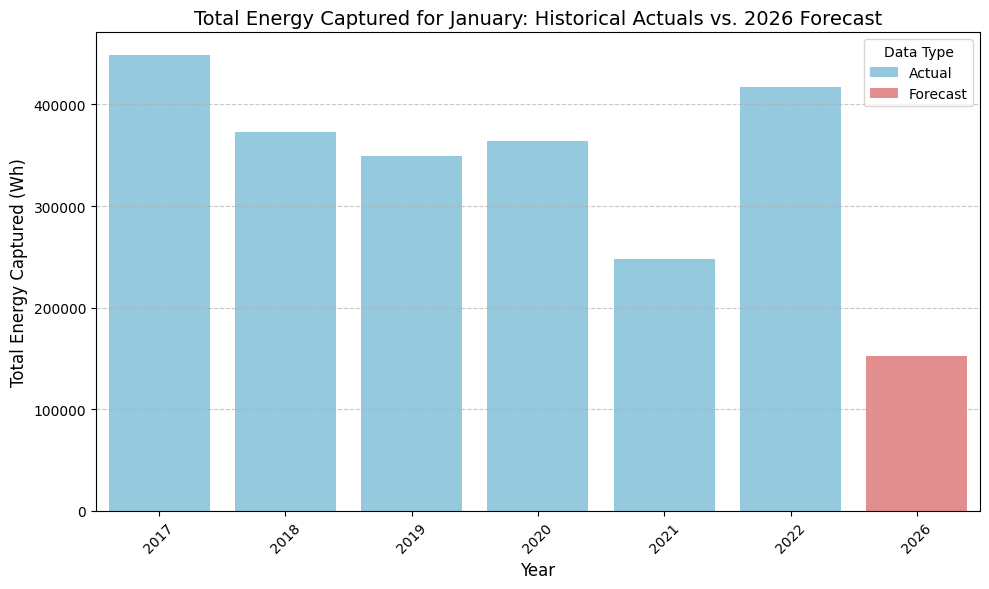

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Energy Captured (Wh)', hue='Type', data=yearly_jan_table, palette={'Actual': 'skyblue', 'Forecast': 'lightcoral'})
plt.title('Total Energy Captured for January: Historical Actuals vs. 2026 Forecast', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Energy Captured (Wh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Data Type')
plt.tight_layout()
plt.show()